In [2]:
!  pip install networkx -q

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

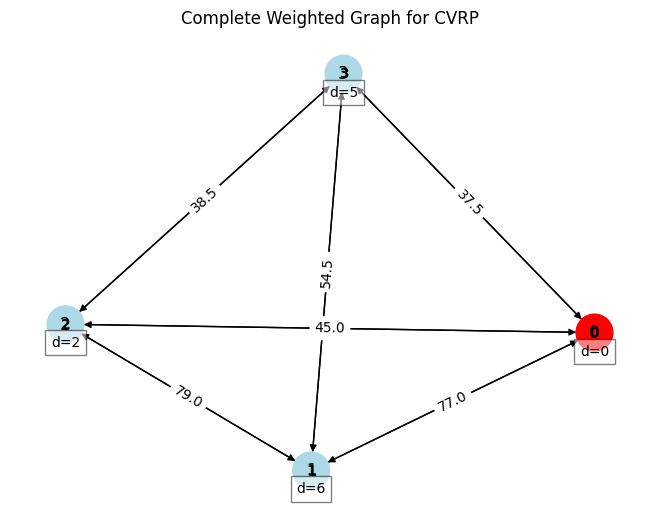

Distance Matrix:
[[ 0.  77.  45.  37.5]
 [77.   0.  79.  54.5]
 [45.  79.   0.  38.5]
 [37.5 54.5 38.5  0. ]]

Demands:
[0 6 2 5]


In [9]:
# Step 1: Generate random distance matrix and demands
np.random.seed(42)  # For reproducibility

num_nodes = 4
max_distance = 100
max_demand = 10

# Create a random symmetric distance matrix with zeros on the diagonal
distance_matrix = np.random.randint(1, max_distance, size=(num_nodes, num_nodes))
np.fill_diagonal(distance_matrix, 0)
distance_matrix = (distance_matrix + distance_matrix.T) / 2

# Create random demands for each node except the depot (node 0)
demands = np.random.randint(1, max_demand, size=num_nodes)
demands[0] = 0  # Depot has 0 demand

# Step 2: Create the graph using NetworkX
G = nx.DiGraph()

# Add nodes with demand as an attribute
for i in range(num_nodes):
    G.add_node(i, demand=demands[i])

# Add edges with distances as weights
for i in range(num_nodes):
    for j in range(num_nodes):
        if i != j:
            G.add_edge(i, j, weight=distance_matrix[i, j])

# Step 3: Draw the graph with edge weights
pos = nx.spring_layout(G)  # Layout for visual representation

# Draw nodes with different colors for depot
node_colors = ["red" if i == 0 else "lightblue" for i in G.nodes()]
nx.draw(
    G,
    pos,
    with_labels=True,
    node_size=700,
    node_color=node_colors,
    font_size=10,
    font_weight="bold",
)

# Draw edge labels (distances)
edge_labels = {(i, j): f"{G[i][j]['weight']:.1f}" for i, j in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Draw node labels (demands) with an offset
node_labels = {i: f"{i}" for i in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels)

# Add demands as separate labels with an offset
for i in G.nodes():
    x, y = pos[i]
    plt.text(
        x,
        y - 0.1,
        s=f"d={demands[i]}",
        bbox=dict(facecolor="white", alpha=0.5),
        horizontalalignment="center",
    )

plt.title("Complete Weighted Graph for CVRP")
plt.show()

# Print the distance matrix and demands
print("Distance Matrix:")
print(distance_matrix)
print("\nDemands:")
print(demands)